In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs
from fig_code import visualize_tree, plot_tree_interactive
from ipywidgets import interact

%matplotlib inline

In [2]:
#importing csv file
df = pd.read_csv('player_stats.csv')

In [3]:
#describing the data
#test to make sure import worked correctly
df.head()

,id,match_won,at_home,player_id,match_id,team_id,MP,OPOS,DPOS,FG,...,ASTP,STLP,BLKP,TOVP,USGP,ORtg,AORtg,DRtg,ADRtg,PLUS_MINUS
0,1,0,0,1,1,14,36.533333,NaN,NaN,9,...,0.0,1.4,0.0,16.2,29.1,107,NaN,106,NaN,-4.0
1,2,0,0,2,1,14,17.233333,NaN,NaN,0,...,8.7,0.0,0.0,34.0,14.7,45,NaN,110,NaN,-18.0
2,3,0,0,3,1,14,4.116667,NaN,NaN,0,...,0.0,0.0,0.0,0.0,10.5,49,NaN,105,NaN,-3.0
3,4,0,0,4,1,14,28.450000,NaN,NaN,5,...,0.0,1.8,2.0,27.3,16.7,97,NaN,110,NaN,-18.0
4,5,0,0,5,1,14,32.250000,NaN,NaN,3,...,10.8,0.0,0.0,24.5,21.8,78,NaN,113,NaN,-13.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70038 entries, 0 to 70037
Data columns (total 57 columns):
id            70038 non-null int64
match_won     70038 non-null int64
at_home       70038 non-null int64
player_id     70038 non-null int64
match_id      70038 non-null int64
team_id       70038 non-null int64
MP            70038 non-null float64
OPOS          0 non-null float64
DPOS          0 non-null float64
FG            70038 non-null int64
FGA           70038 non-null int64
FGP           66692 non-null float64
PTS           70038 non-null int64
TWO           70038 non-null int64
TWOA          70038 non-null int64
TWOP          63939 non-null float64
TWOAr         66692 non-null float64
THR           70038 non-null int64
THRA          70038 non-null int64
THRP          46032 non-null float64
THRAr         66692 non-null float64
FT            70038 non-null int64
FTA           70038 non-null int64
FTP           39943 non-null float64
FTAr          66692 non-null float64
FT_t

In [5]:
df.describe()

,id,match_won,at_home,player_id,match_id,team_id,MP,OPOS,DPOS,FG,...,ASTP,STLP,BLKP,TOVP,USGP,ORtg,AORtg,DRtg,ADRtg,PLUS_MINUS
count,70038.000000,70038.000000,70038.000000,70038.000000,70038.000000,70038.000000,70038.000000,0.0,0.0,70038.000000,...,70036.000000,70038.000000,70038.000000,67670.000000,70038.000000,70038.000000,0.0,70038.000000,0.0,70034.000000
mean,36013.511094,0.500271,0.500585,5597.238413,1698.928767,15.573532,22.703263,NaN,NaN,3.581085,...,13.374847,1.573794,1.614745,13.138979,19.121047,101.180916,NaN,107.715726,NaN,0.000086
std,20230.562252,0.500003,0.500003,14118.556025,952.674061,8.711614,10.681391,NaN,NaN,2.958111,...,16.311769,2.606662,3.445485,15.071908,9.044937,46.608398,NaN,14.143981,NaN,10.787162
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.016667,NaN,NaN,0.000000,...,-1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,-345.000000,NaN,-47.000000
25%,18511.250000,0.000000,0.000000,132.000000,873.000000,8.000000,15.016667,NaN,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,13.500000,77.000000,NaN,99.000000,NaN,-7.000000
50%,36020.500000,1.000000,1.000000,250.000000,1700.000000,16.000000,23.350000,NaN,NaN,3.000000,...,9.900000,0.000000,0.000000,10.400000,18.700000,104.000000,NaN,108.000000,NaN,0.000000
75%,53529.750000,1.000000,1.000000,1831.000000,2532.000000,23.000000,31.233333,NaN,NaN,5.000000,...,20.100000,2.600000,2.500000,20.000000,24.300000,127.000000,NaN,117.000000,NaN,7.000000
max,71039.000000,1.000000,1.000000,83346.000000,3337.000000,30.000000,60.116667,NaN,NaN,22.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,300.000000,NaN,161.000000,NaN,48.000000


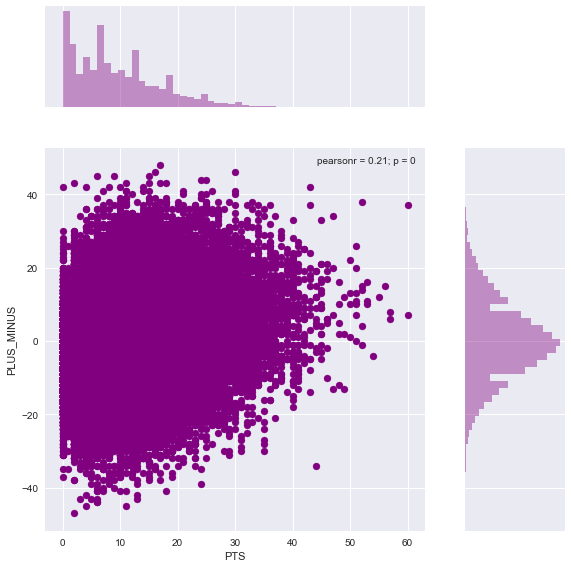

In [11]:
#jointplot showing how points per game compare to player's plus/minus
#more points typically leads to higher avg. plus/minus
sns.jointplot('PTS','PLUS_MINUS',data=df,color='purple',size=8,ratio=3,space=0.4)

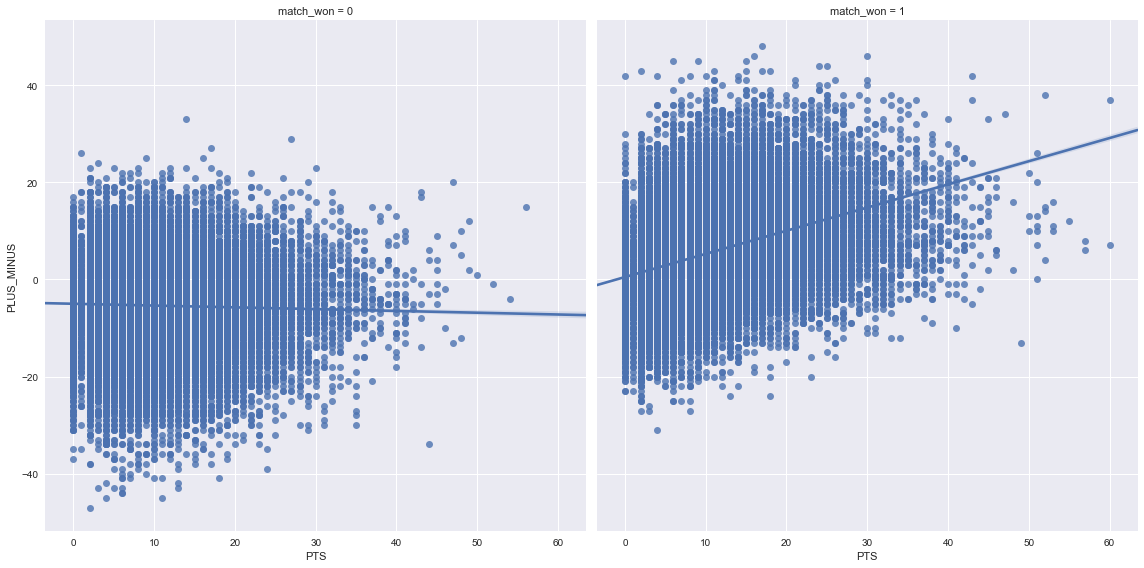

In [10]:
#plots comparing relationship between points scored and plus/minus
#two plots, one for matches won, one for matches lost
#for matches won, players tend to have a higher plus/minus and amount of points
sns.lmplot('PTS','PLUS_MINUS',data=df,col='match_won',size=8)

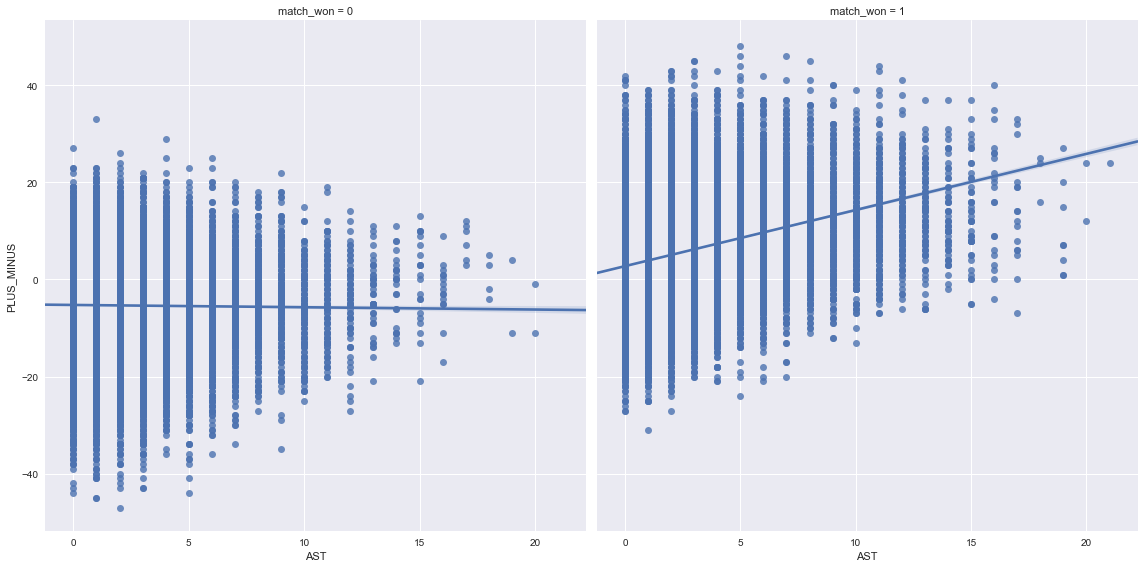

In [12]:
#plots comparing relationship between assists and plus/minus
#two plots, one for matches won, one for matches lost
#for matches won, players tend to have a higher plus/minus and amount of assists
sns.lmplot('AST','PLUS_MINUS',data=df,col='match_won',size=8)

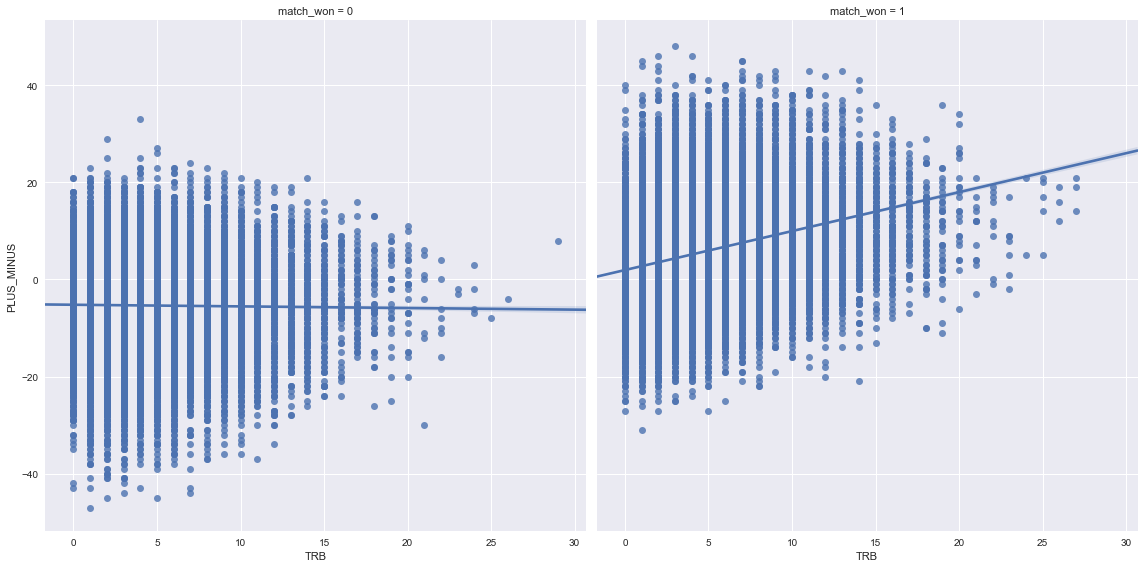

In [13]:
#plots comparing relationship between total rebounds and plus/minus
#two plots, one for matches won, one for matches lost
#for matches won, players tend to have a higher plus/minus and amount of rebounds
sns.lmplot('TRB','PLUS_MINUS',data=df,col='match_won',size=8)

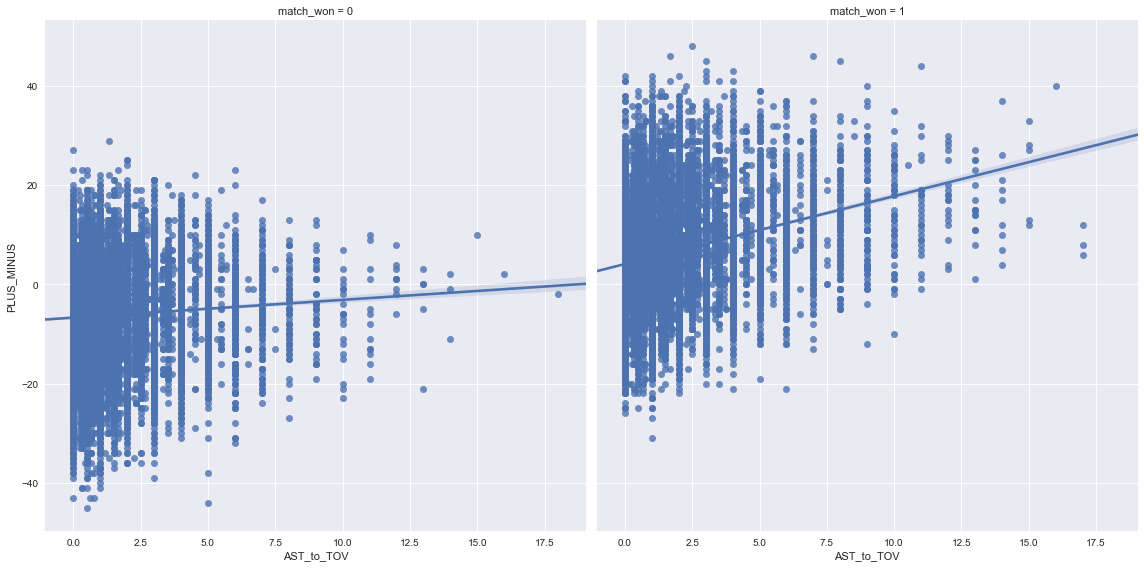

In [14]:
#plots comparing relationship between assist-to-turnover ratio and plus/minus
#two plots, one for matches won, one for matches lost
#for matches won, players tend to have a higher plus/minus and AST-TOV
sns.lmplot('AST_to_TOV','PLUS_MINUS',data=df,col='match_won',size=8)

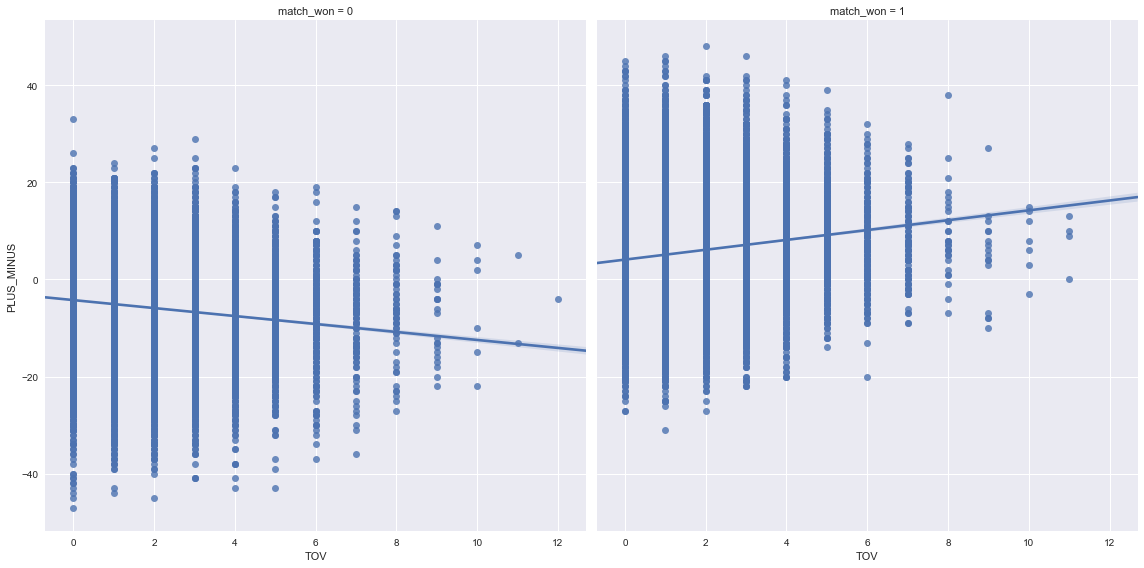

In [15]:
#plots comparing relationship between turnovers and plus/minus
#two plots, one for matches won, one for matches lost
#for matches won, players tend to have a higher plus/minus and amount of turnovers
sns.lmplot('TOV','PLUS_MINUS',data=df,col='match_won',size=8)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70038 entries, 0 to 70037
Data columns (total 57 columns):
id            70038 non-null int64
match_won     70038 non-null int64
at_home       70038 non-null int64
player_id     70038 non-null int64
match_id      70038 non-null int64
team_id       70038 non-null int64
MP            70038 non-null float64
OPOS          0 non-null float64
DPOS          0 non-null float64
FG            70038 non-null int64
FGA           70038 non-null int64
FGP           66692 non-null float64
PTS           70038 non-null int64
TWO           70038 non-null int64
TWOA          70038 non-null int64
TWOP          63939 non-null float64
TWOAr         66692 non-null float64
THR           70038 non-null int64
THRA          70038 non-null int64
THRP          46032 non-null float64
THRAr         66692 non-null float64
FT            70038 non-null int64
FTA           70038 non-null int64
FTP           39943 non-null float64
FTAr          66692 non-null float64
FT_t

In [22]:
cat_feats = ['match_won']
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)
final_data.head()

,id,at_home,player_id,match_id,team_id,MP,OPOS,DPOS,FG,FGA,...,STLP,BLKP,TOVP,USGP,ORtg,AORtg,DRtg,ADRtg,PLUS_MINUS,match_won_1
0,1,0,1,1,14,36.533333,NaN,NaN,9,18,...,1.4,0.0,16.2,29.1,107,NaN,106,NaN,-4.0,0
1,2,0,2,1,14,17.233333,NaN,NaN,0,3,...,0.0,0.0,34.0,14.7,45,NaN,110,NaN,-18.0,0
2,3,0,3,1,14,4.116667,NaN,NaN,0,1,...,0.0,0.0,0.0,10.5,49,NaN,105,NaN,-3.0,0
3,4,0,4,1,14,28.450000,NaN,NaN,5,8,...,1.8,2.0,27.3,16.7,97,NaN,110,NaN,-18.0,0
4,5,0,5,1,14,32.250000,NaN,NaN,3,11,...,0.0,0.0,24.5,21.8,78,NaN,113,NaN,-13.0,0


In [29]:
#train-test splitting
X,y = make_blobs(n_samples=300, centers=4,
                random_state=0, cluster_std=2.0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [32]:
#training the decision trees
#predictions and inferences
dTree = DecisionTreeClassifier()
dTree.fit(X_train, y_train)
predictions = dTree.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.50      0.32      0.39        28
          1       0.71      0.81      0.76        27
          2       0.41      0.53      0.46        17
          3       0.63      0.67      0.65        18

avg / total       0.57      0.58      0.57        90



In [35]:
#confusion matrix for decision tree
print(confusion_matrix(y_test, predictions))

[[ 9  5  9  5]
 [ 3 22  2  0]
 [ 2  4  9  2]
 [ 4  0  2 12]]


In [33]:
#training random forests
#predictions and classifiers
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test, rfc_pred))

             precision    recall  f1-score   support

          0       0.53      0.29      0.37        28
          1       0.75      0.78      0.76        27
          2       0.39      0.65      0.49        17
          3       0.63      0.67      0.65        18

avg / total       0.59      0.58      0.57        90



In [34]:
#confusion matrix for random forests
print(confusion_matrix(y_test, rfc_pred))

[[ 8  4 11  5]
 [ 2 21  4  0]
 [ 1  3 11  2]
 [ 4  0  2 12]]


<function __main__.fit_tree>

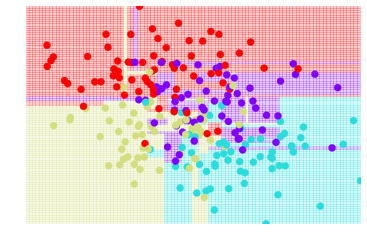

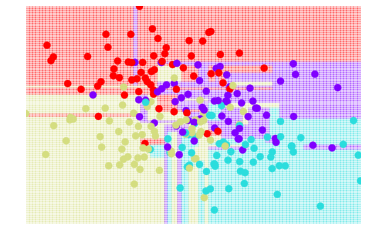

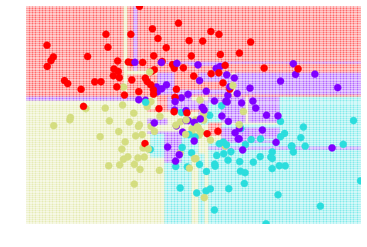

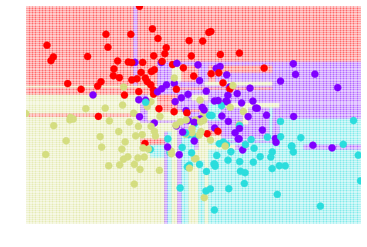

In [37]:
#visualization of decision tree classification
#code from https://github.com/donnemartin/data-science-ipython-notebooks/blob/master/scikit-learn/scikit-learn-random-forest.ipynb
def fit_tree(random_state = 0):
    X, y = make_blobs(n_samples=300, centers=10,
                     random_state=0, cluster_std=2.0)
    clf = DecisionTreeClassifier(max_depth=15)
    rng = np.random.RandomState(random_state)
    i = np.arange(len(y))
    rng.shuffle(i)
    visualize_tree(clf, X[i[:250]], y[i[:250]], boundaries=False,
                  xlim=(X[:, 0].min(), X[:, 0].max()),
                  ylim=(X[:, 1].min(), X[:, 1].max()))

interact(fit_tree, random_state=[0, 100])

array([1, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0, 2, 2,
       3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2, 3, 1, 3,
       2, 0, 2, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0, 3, 3, 0, 1,
       3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0, 2, 2, 1, 3, 1,
       0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2, 2, 1, 3, 2, 2, 3,
       0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 3, 0, 1, 2, 3, 2, 1, 0, 3,
       0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3, 1, 1, 0, 2, 1, 0, 2, 2,
       0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0, 2, 3, 0, 2, 1, 2, 0, 3, 2,
       3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0, 3, 1, 1, 2, 1, 2, 0, 3, 3, 0,
       0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0, 1, 3, 3, 3, 3, 2, 2, 3, 0, 2, 1,
       0, 2, 2, 2, 1, 1, 3, 0, 0, 2, 1, 3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1,
       1, 0, 3, 3, 1, 1, 0, 1, 1, 1, 3, 2, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 3,
       2])

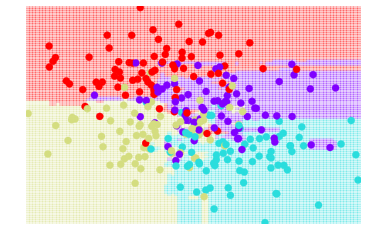

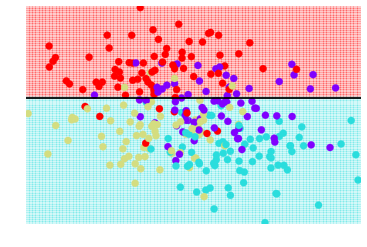

In [42]:
#continuation of visualization of random forests
#shows how the decision trees are splitting at depths of 1 and 5
#code from https://github.com/donnemartin/data-science-ipython-notebooks/blob/master/scikit-learn/scikit-learn-random-forest.ipynb
X, y = make_blobs(n_samples=300, centers=10, random_state=0, cluster_std=2.0)
clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
visualize_tree(clf, X, y, boundaries=False)
plot_tree_interactive(X,y);
clf.predict(X)